In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### embedding

In [2]:
word = {'hello':0 , 'world':1}

In [3]:
a = torch.tensor([word['hello']])

In [4]:
embed= nn.Embedding(2,5)

In [5]:
embed(a)

tensor([[-1.3250,  0.2561, -1.7020,  1.1529,  0.0402]],
       grad_fn=<EmbeddingBackward>)

### 压缩f 的维度从5到1

In [38]:
data = torch.rand(10 , 48  , 5) #  v ,t , f 

In [39]:
data = data.view(10, -1)    #  v , t  

In [40]:
data.shape

torch.Size([10, 240])

In [41]:
linear1 = nn.Linear(240 , 48)
output = linear1(data)
output.reshape(10,48 ,1)

tensor([[[-0.7359],
         [-0.4803],
         [-0.0638],
         [-0.1721],
         [-0.7736],
         [-0.5871],
         [ 0.2417],
         [ 0.0346],
         [-0.3177],
         [ 0.0943],
         [ 0.6796],
         [-0.0186],
         [ 0.3742],
         [-0.0137],
         [-0.4687],
         [ 0.0780],
         [ 0.0357],
         [ 0.2639],
         [-0.0762],
         [-0.0437],
         [ 0.0804],
         [ 0.0214],
         [-0.0719],
         [ 0.0975],
         [ 0.2019],
         [ 0.4120],
         [ 0.1093],
         [ 0.2847],
         [ 0.0528],
         [-0.0842],
         [ 0.1184],
         [-0.1976],
         [-0.2232],
         [-0.5953],
         [-0.2085],
         [-0.2552],
         [-0.0719],
         [-0.7749],
         [-0.4057],
         [-0.3374],
         [ 0.3988],
         [-0.3046],
         [ 0.0658],
         [ 0.2916],
         [-0.2568],
         [-0.2850],
         [ 0.5935],
         [ 0.0039]],

        [[-0.3232],
         [-0.6158]

### 参数标准化 uniform_

In [53]:
from torch.nn.parameter import Parameter
p1 = Parameter(torch.FloatTensor(4, 4))
p1

Parameter containing:
tensor([[1.5414e-44, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]], requires_grad=True)

In [54]:
p1.data.uniform_(-0.5 , 0.5)

tensor([[ 0.4155, -0.2765, -0.1535,  0.3942],
        [ 0.1942, -0.2998, -0.4919,  0.2088],
        [-0.3870, -0.0095,  0.1049, -0.1374],
        [ 0.4452,  0.2468,  0.3518, -0.4824]])

In [44]:
import math
weight = Parameter(torch.FloatTensor(4, 4))
stdv = 1. / math.sqrt(weight.size(1))
weight.data.uniform_(-stdv, stdv)

tensor([[-0.2059, -0.1564, -0.0084,  0.0633],
        [-0.0487, -0.3821,  0.4888, -0.2574],
        [-0.0788,  0.4098, -0.1890, -0.3871],
        [-0.2003, -0.2328, -0.1334, -0.1029]])

### 定义参数

In [55]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.param = nn.Parameter(torch.rand(3,3)) 
        # 等价与self.register_parameter('param1' ,nn.Parameter(t.randn(3, 3)))
    def forward(self,input):
        x = self.param.mm(input)
        return x 
n = Net()   

In [56]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.register_parameter('param',nn.Parameter(torch.randn(3, 3)))
    def forward(self,input):
        x = self.param.mm(input)
        return x 
n = Net()   

### cluster gcn

In [57]:
c = torch.randint(3, 5, (10,2))  # n , k
w = torch.randint(3, 5, (2,3,4)) #  k , f1, f2 

In [58]:
out = torch.mm(c,w.view(2,-1)) # n , f1*f2

In [49]:
out.view(10,3,4).shape # n , f1 , f2 

torch.Size([10, 3, 4])

In [28]:
W = nn.Parameter(torch.rand(10,2,3)) 

In [29]:
con1 = nn.Conv2d(1, 1, 16) 

In [30]:
def cw( c , w):
    """
    input:  
    output : w of clustered 
    """
    CW = []
    for i in range(c.shape[0]):
        w_i = c[i][0] * w[0] + c[i][1]*w[1] + c[i][2] *w[2] 
        CW.append(w_i)
    return CW 

In [31]:
c = torch.rand(10 ,3 )  # v , k 
w = torch.rand(3,2,2)  # v , f1, f2

### soft cluster

In [32]:
linear1 = nn.Linear(5 , 1) 

In [33]:
x = torch.randn(4,2, 3, 5)

In [34]:
linear1(x).view(4,2,3).shape

torch.Size([4, 2, 3])

In [35]:
softmax = nn.Softmax(dim=-1)

In [36]:
softmax(x).shape

torch.Size([4, 2, 3, 5])

### 矩阵间的欧式距离


In [37]:
A = torch.Tensor( [[0.1 , 0.9], [0.2,0.8]] ) 
B = torch.Tensor([[0.2 , 0.8], [0.1,0.9] ])
C = torch.Tensor([[0.1 , 0.9], [0.2,0.8] ])
C = A - B 
C

tensor([[-0.1000,  0.1000],
        [ 0.1000, -0.1000]])

In [30]:
torch.sum(C**2)

tensor(0.0400)

In [31]:
def cluster_distance(A,B):
    D = A - B
    return torch.sum( D**2) 

In [32]:
# 排列组合
import itertools
list(itertools.permutations([1,2,3,4],2))
list(itertools.combinations([1,2,3,4],2))

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

In [33]:
A = torch.Tensor( [[0.1 , 0.9], [0.2,0.8]] ) 
B = torch.Tensor([[0.2 , 0.8], [0.1,0.9] ])
C = torch.Tensor([[0.1 , 0.9], [0.2,0.8] ])
D = torch.Tensor([[0.3 , 0.7], [0.6,0.4] ])
list(itertools.combinations([A , B , C],2))

[(tensor([[0.1000, 0.9000],
          [0.2000, 0.8000]]), tensor([[0.2000, 0.8000],
          [0.1000, 0.9000]])), (tensor([[0.1000, 0.9000],
          [0.2000, 0.8000]]), tensor([[0.1000, 0.9000],
          [0.2000, 0.8000]])), (tensor([[0.2000, 0.8000],
          [0.1000, 0.9000]]), tensor([[0.1000, 0.9000],
          [0.2000, 0.8000]]))]

In [34]:
def matrix_distance(A,B):
    D = A - B
    return torch.sum(D**2) 

In [35]:
import itertools
def cluster_distance(m_list):
    p = list(itertools.combinations(m_list,2))
    res = 0 
    for item in p:
        res_item = matrix_distance(item[0] , item[1])
        res += res_item
    return res

In [36]:
cluster_distance([A,B,C,D])

tensor(1.4000)

### 基尼系数

In [67]:
def gini_impurity(tensor):
    # 越大表示越平均， 越小表示纯度越高
    # k -> 1 
    return 1 - torch.sum(tensor**2)  

In [68]:
tensor = torch.Tensor([0.5,0.5,0.0])
tensor2 = torch.Tensor([0.0,1,0.0])
tensor3 = torch.Tensor([0.5,0.5])
gini_impurity(tensor2)

tensor(0.)

In [69]:
def cluster_purity(data):
    return torch.sum(gini_impurity(data))

In [70]:
tensor = torch.rand(3,3,4)
cluster_purity(tensor)

tensor(-11.6869)

In [65]:
def cluster_consistence(data):
    # input : b, v , k -> b, v ,1 
    res1= []
    for x in data:
        res2 = []
        for c in x:
            res2.append(gini_impurity(c))
        res1.append(torch.sum(res2))
    return torch.sum(res1)

In [66]:
tensor = torch.rand(3,3,4)
cluster_consistence(tensor)

TypeError: sum(): argument 'input' (position 1) must be Tensor, not list

In [51]:
def cluster_diversity(data):
    k = data.shape[-1]
    res = []
    for x in data:
        # x : (n,k)
        ans = torch.sum(x)/k
        res.append(-gini_impurity(ans))
    return torch.mean(res)

In [52]:
tensor = torch.rand(3,3,4)
cluster_diversity(tensor)

tensor(-0.5942)

In [53]:
def gini_impurity(tensor):
    # 越大表示越平均， 越小表示纯度越高
    # k -> 1 
    return 1 - sum(tensor**2)  

def cluster_consistence(data):
    # input : b, v , k -> b, v ,1 
    res1= []
    for x in data:
        res2 = []
        for c in x:
            res2.append(gini_impurity(c))
        res1.append(sum(res2))
    return sum(res1)

def cluster_diversity(data):
    k = data.shape[-1]
    res = []
    for x in data:
        # x : (n,k)
        ans = sum(x)/k
        res.append(-gini_impurity(ans))
    return sum(res)

### dataloader 

In [59]:
import torchvision
import torchvision.transforms as transforms
train_dataset = torch.rand(50, 10 , 5)

In [60]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=10, 
                                           shuffle=True)

In [61]:
len(train_loader)

5

In [62]:
for i, data in enumerate(train_loader): 
    print(i,data.size())

0 torch.Size([10, 10, 5])
1 torch.Size([10, 10, 5])
2 torch.Size([10, 10, 5])
3 torch.Size([10, 10, 5])
4 torch.Size([10, 10, 5])


### cluster distance 

In [63]:
import itertools
def matrix_distance(A,B):
    D = A - B
    return torch.mean(D**2) 
def cluster_distance(m_list):
    p = list(itertools.combinations(m_list,2))
    res = []
    for item in p:
        res_item = matrix_distance(item[0] , item[1])
        res.append(res_item)
        res = torch.Tensor( res ) 
    return torch.mean(res)

In [64]:
A = torch.Tensor( [[0.1 , 0.9], [0.2,0.8]] ) 
B = torch.Tensor([[0.2 , 0.8], [0.1,0.9] ])

In [65]:
cluster_distance([A,B])

tensor(0.0100)

### graph to batch graph

In [67]:
graph = torch.Tensor( [ [2,3], [5,6] ])
graph.unsqueeze(0)
graph = graph.repeat(2 ,1,1) 
print(graph)

tensor([[[2., 3.],
         [5., 6.]],

        [[2., 3.],
         [5., 6.]]])


### 软分类 to 硬分类

In [69]:
cluster = torch.Tensor([[0.9,0.1],[0.2,0.8] , [0.8,0.2] , [0.7,0.3] ])
cluster

tensor([[0.9000, 0.1000],
        [0.2000, 0.8000],
        [0.8000, 0.2000],
        [0.7000, 0.3000]])

In [70]:
torch.max(cluster , 1)[0]

tensor([0.9000, 0.8000, 0.8000, 0.7000])

In [13]:
m = torch.transpose(torch.max(cluster , 1)[0].repeat(2,1),0,1)
a = torch.ones(4,2)
b = torch.zeros(4,2)
torch.where(cluster-m>=0 , a, b)

tensor([[1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.]])

### 加batch

In [71]:
soft_cluster = torch.Tensor([[[0.9,0.1,0.1],[0.2,0.4,0.8] , [0.8,0.6,0.2] , [0.7,0.3,0.1]]])
soft_cluster.shape

torch.Size([1, 4, 3])

In [72]:
max_mat = torch.max(soft_cluster, -1)[0].unsqueeze(-1).repeat(1, 1, 3)
max_mat

tensor([[[0.9000, 0.9000, 0.9000],
         [0.8000, 0.8000, 0.8000],
         [0.8000, 0.8000, 0.8000],
         [0.7000, 0.7000, 0.7000]]])

In [73]:
out = torch.rand([1, 4 ,3])

In [17]:
torch.max(soft_cluster, -1)[0]

tensor([[0.9000, 0.8000, 0.8000, 0.7000]])

In [18]:
a = torch.ones(1,4,3)
b = torch.zeros(1,4,3)

In [19]:
hard_cluster = torch.where(soft_cluster-max_mat >=0 , a , b)
hard_cluster

tensor([[[1., 0., 0.],
         [0., 0., 1.],
         [1., 0., 0.],
         [1., 0., 0.]]])

In [20]:
hard_cluster[:, :, 0]

tensor([[1., 0., 1., 1.]])

In [21]:
out

tensor([[[0.8020, 0.2433, 0.5654],
         [0.7393, 0.5971, 0.2951],
         [0.7850, 0.3613, 0.4925],
         [0.8192, 0.9343, 0.2774]]])

In [22]:
torch.mul(out ,hard_cluster[:, :, 0].unsqueeze(-1))

tensor([[[0.8020, 0.2433, 0.5654],
         [0.0000, 0.0000, 0.0000],
         [0.7850, 0.3613, 0.4925],
         [0.8192, 0.9343, 0.2774]]])

### 构建sparse matrix

In [23]:
import numpy as np

In [24]:
graph_2D = torch.FloatTensor((np.random.rand(4,4)>0.9).astype(np.int))
graph_2D

tensor([[0., 1., 0., 1.],
        [0., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 0.]])

### 转置

In [80]:
x = torch.Tensor([[1,2],[3,4]])
x

tensor([[1., 2.],
        [3., 4.]])

In [81]:
torch.transpose(x, 0, 1)

tensor([[1., 3.],
        [2., 4.]])

In [82]:
x.t()

tensor([[1., 3.],
        [2., 4.]])

In [83]:
a = torch.rand(1,1,2)

In [84]:
a.squeeze(0).shape

torch.Size([1, 2])

In [85]:
a.squeeze().shape

torch.Size([2])

In [86]:
a = torch.rand(3,3, 5)
b = torch.rand(5,1)
torch.matmul(a,b).shape

torch.Size([3, 3, 1])

In [3]:
a = torch.rand(2,3,4)
W = nn.Linear(4,1)

In [5]:
W(a).shape

torch.Size([2, 3, 1])

### deepwalk
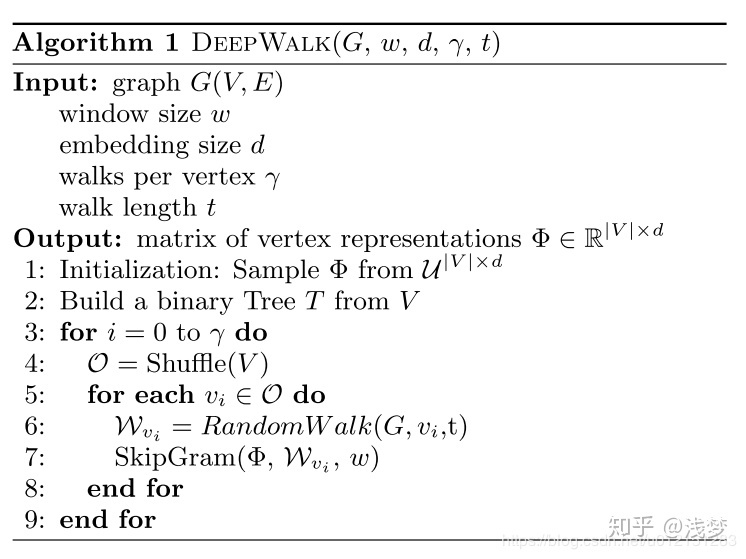

### RandomWalk and Skip-gram 
RandomWalk是一种可重复访问已访问节点的深度优先遍历算法。给定当前访问起始节点，从其邻居中随机采样节点作为下一个访问节点，重复此过程，直到访问序列长度满足预设条件。
获取足够数量的节点访问序列后(相当于得到了很多句子），使用skip-gram model 进行向量学习。
skip-gram 就相当于 Word2Vec

开始借鉴NLP思想，这条路径上临近点与点之间必然联系密切 有共同特征。现在将3-2-4-5当作一个句子，各个顶点为句子中单词

In [98]:
import random 
random.choice([1,2,3])

3

In [99]:
def deep_walk(walk_length, start_node):
    walk = []
    while len(walk) < walk_length :
        cur_node = walk[-1]
        cur_neighbor = neighbor(cur_node)
        if len(cur_neighbor) > 0 :
            walk.append(random.coice(cur_neighbor))
        else:
            break
    return walk